In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
from datetime import datetime
from matplotlib import rcParams

from matplotlib import rc
rc('font',family='Malgun Gothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [148]:
movie = pd.read_csv("../data/Preprocessing_movie_data/Data_processing.data.csv", parse_dates=['openingdate'])
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,0,(주)씨제이이엔엠,이병헌,0,3,2
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,0,(주)씨제이이엔엠,정세교,1,3,1
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,0,(주)씨제이이엔엠,류승완,2,3,2
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1


## 2. EDA

### 2-1. 기초통계량

In [149]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   moviename    1022 non-null   object        
 1   openingdate  1022 non-null   datetime64[ns]
 2   sales        1022 non-null   float64       
 3   attendance   1022 non-null   float64       
 4   screen       1022 non-null   float64       
 5   playcount    1022 non-null   float64       
 6   country      1022 non-null   int64         
 7   distributor  1022 non-null   object        
 8   director     1022 non-null   object        
 9   genre        1022 non-null   int64         
 10  actor        1022 non-null   int64         
 11  filmrank     1022 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 95.9+ KB


In [150]:
movie.describe()

,sales,attendance,screen,playcount,country,genre,actor,filmrank
count,1022.0,1022.0,1022.0,1022.0,1022.0,1022.0,1022.0,1022.0
mean,13315086352.0,1676840.0,690.7,44071.7,0.6,5.2,2.7,1.4
std,17073672112.7,2124099.4,388.5,38612.5,0.5,3.9,0.6,0.9
min,407193640.0,51681.0,33.0,2179.0,0.0,0.0,1.0,0.0
25%,3336767966.2,435086.2,415.2,17926.2,0.0,2.0,2.0,1.0
50%,6996539705.0,890931.5,590.5,30431.5,1.0,4.0,3.0,2.0
75%,16419330569.2,2065293.2,877.5,56744.5,1.0,6.0,3.0,2.0
max,139651845516.0,17613682.0,2835.0,292584.0,1.0,18.0,6.0,4.0


### 2-2. 개봉일자별 관람객 수

In [151]:
# 개봉월(openingmonth) 칼럼 생성
movie['openingmonth'] = movie['openingdate'].dt.month
movie.head()

,moviename,openingdate,sales,attendance,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth
0,극한직업,2019-01-23,139651845516.0,16265618.0,2003.0,292584.0,0,(주)씨제이이엔엠,이병헌,0,3,2,1
1,명량,2014-07-30,135748398910.0,17613682.0,1587.0,188611.0,0,(주)씨제이이엔엠,정세교,1,3,1,7
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,13934592.0,2835.0,242001.0,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1,4
3,베테랑,2015-08-05,105168155250.0,13414009.0,1115.0,199231.0,0,(주)씨제이이엔엠,류승완,2,3,2,8
4,신과함께-인과 연,2018-08-01,102666146909.0,12274996.0,2235.0,179981.0,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1,8


In [152]:
### 월별 관람객 수
movie_month = pd.DataFrame(movie.groupby(by='openingmonth')['attendance'].mean().reset_index())
movie_month

,openingmonth,attendance
0,1,1855247.9
1,2,1349298.4
2,3,1173424.2
3,4,1935841.3
4,5,1571239.5
5,6,1740411.8
6,7,2530996.0
7,8,2133992.4
8,9,1559458.6
9,10,1614676.1


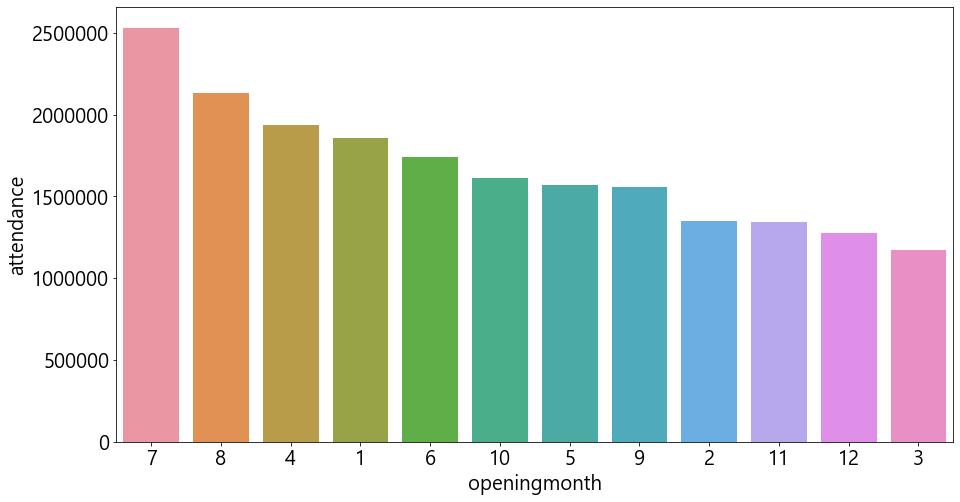

In [153]:
order=movie.groupby(by='openingmonth')['attendance'].mean().sort_values(ascending=False).index
sns.barplot(x=movie_month['openingmonth'], y=movie_month['attendance'], order=order)

### 2-3. 장르별 관객 수

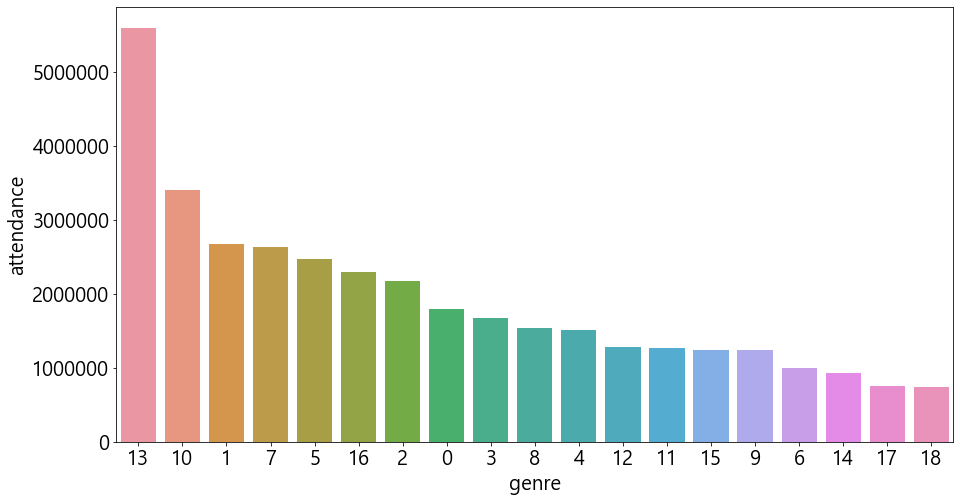

In [154]:
### 장르별 관객수
## 코미디 : 0, 다큐멘터리 : 1, 액션 : 2, 판타지 : 3, 드라마 : 4, 범죄 : 5, 
## 애니메이션 : 6,  SF : 7, 모험 :8, 미스터리 : 9, 전쟁 : 10, 멜로/로맨스 : 11, 
## 스릴러, 서스펜스 : 12, 서사 : 13, 공포 : 14, 느와르 : 15, 뮤지컬 : 16,
## 가족 : 17, 그 외 : 18
movie_genre = pd.DataFrame(movie.groupby(by='genre')['attendance'].mean()).reset_index()

order = movie.groupby(by='genre')['attendance'].mean().sort_values(ascending=False).index
sns.barplot(x=movie_genre['genre'], y=movie_genre['attendance'], order=order)

In [ ]:
# 서사, 전쟁, 다큐멘터리, SF, 범죄 장르 순으로 관객수가 가장 많았다.

### 2-4. 관람등급별 관객 수

In [155]:
#전체관람가 : 0, 12세관람가 : 1, 15세관람가 : 2, 청소년관람불가 : 3, 그 외 : 4
movie_rank = pd.DataFrame(movie.groupby('filmrank')['attendance'].mean())
movie_rank

,attendance
filmrank,
0,982977.4
1,1957376.7
2,1843703.9
3,1469234.4
4,306012.0


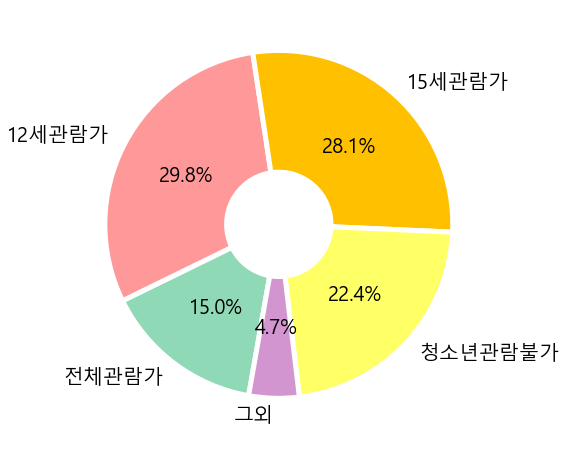

In [156]:
labels = ['전체관람가', '12세관람가', '15세관람가', '청소년관람불가', '그외']
values = list(movie_rank['attendance'])
colors5 = ['#8fd9b6', '#ff9999', '#ffc000', '#ffff66', '#d395d0']
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors5, wedgeprops=wedgeprops)
plt.rc('font', size=20)
plt.show()

### 2-5. 배급사별 관람객 수

In [124]:
movie['distributor'].value_counts()

(주)씨제이이엔엠                                 146
롯데쇼핑㈜롯데엔터테인먼트                             108
(주)넥스트엔터테인먼트월드(NEW)                        88
워너브러더스 코리아(주)                              84
유니버설픽쳐스인터내셔널 코리아(유)                        72
                                         ... 
(주)리틀빅픽쳐스,(주)트리니티픽쳐스                        1
(주)드림팩트엔터테인먼트,(주)제이앤씨미디어그룹,TCO(주)더콘텐츠온      1
(주)넥스트엔터테인먼트월드(NEW),(주)에스비에스콘텐츠허브           1
메가박스중앙(주)플러스엠,(주)미디어캐슬,워터홀컴퍼니(주)            1
씨제이포디플렉스 주식회사                               1
Name: distributor, Length: 133, dtype: int64

In [116]:
movie_dist = pd.DataFrame(movie.groupby('distributor')['attendance'].sum().sort_values(ascending=False).head(10))
movie_dist

,attendance
distributor,
"월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아(주)",10494499.0
"월트디즈니컴퍼니코리아 유한책임회사,한국소니픽쳐스릴리징브에나비스타영화㈜",7074867.0
"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)",4870162.5
"롯데쇼핑㈜롯데엔터테인먼트,(주)싸이더스",4015361.0
(주)와우픽쳐스,3587173.0
"(주)에이스메이커무비웍스,(주)키위미디어그룹",3364712.0
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",3279296.0
"(주)스튜디오디에이치엘,주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)",3194693.0
아이러브시네마,3117859.0


### 2-7. 감독별 관람객 수

### 2-8. Correlation

In [157]:
### column 순서 바꾸기(attendance가 젤 마지막에)
col = movie.columns.to_numpy()
col = col[[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 3]]
movie = movie[col]
movie.head()

,moviename,openingdate,sales,screen,playcount,country,distributor,director,genre,actor,filmrank,openingmonth,attendance
0,극한직업,2019-01-23,139651845516.0,2003.0,292584.0,0,(주)씨제이이엔엠,이병헌,0,3,2,1,16265618.0
1,명량,2014-07-30,135748398910.0,1587.0,188611.0,0,(주)씨제이이엔엠,정세교,1,3,1,7,17613682.0
2,어벤져스: 엔드게임,2019-04-24,122182694160.0,2835.0,242001.0,1,월트디즈니컴퍼니코리아 유한책임회사,안소니 루소,2,3,1,4,13934592.0
3,베테랑,2015-08-05,105168155250.0,1115.0,199231.0,0,(주)씨제이이엔엠,류승완,2,3,2,8,13414009.0
4,신과함께-인과 연,2018-08-01,102666146909.0,2235.0,179981.0,0,롯데컬처웍스(주)롯데엔터테인먼트,김용화,3,3,1,8,12274996.0


In [158]:
movie.corr()

,sales,screen,playcount,country,genre,actor,filmrank,openingmonth,attendance
sales,1.0,0.7,0.9,-0.1,-0.1,0.1,0.1,-0.0,1.0
screen,0.7,1.0,0.8,-0.1,-0.1,0.0,0.0,0.0,0.6
playcount,0.9,0.8,1.0,-0.2,-0.1,0.0,0.1,-0.0,0.9
country,-0.1,-0.1,-0.2,1.0,-0.1,-0.0,-0.3,-0.0,-0.1
genre,-0.1,-0.1,-0.1,-0.1,1.0,-0.0,0.1,0.1,-0.1
actor,0.1,0.0,0.0,-0.0,-0.0,1.0,-0.0,-0.0,0.1
filmrank,0.1,0.0,0.1,-0.3,0.1,-0.0,1.0,-0.0,0.1
openingmonth,-0.0,0.0,-0.0,-0.0,0.1,-0.0,-0.0,1.0,-0.0
attendance,1.0,0.6,0.9,-0.1,-0.1,0.1,0.1,-0.0,1.0


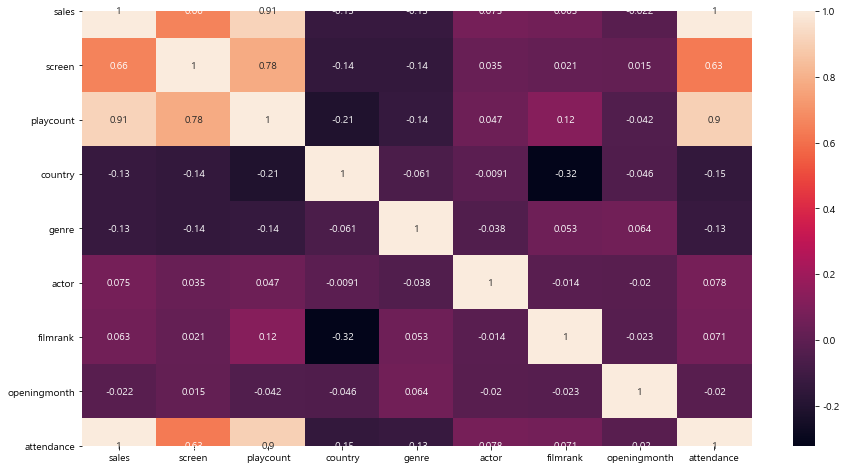

In [159]:
plt.rc('font', size=10)
sns.heatmap(movie.corr(), annot=True)